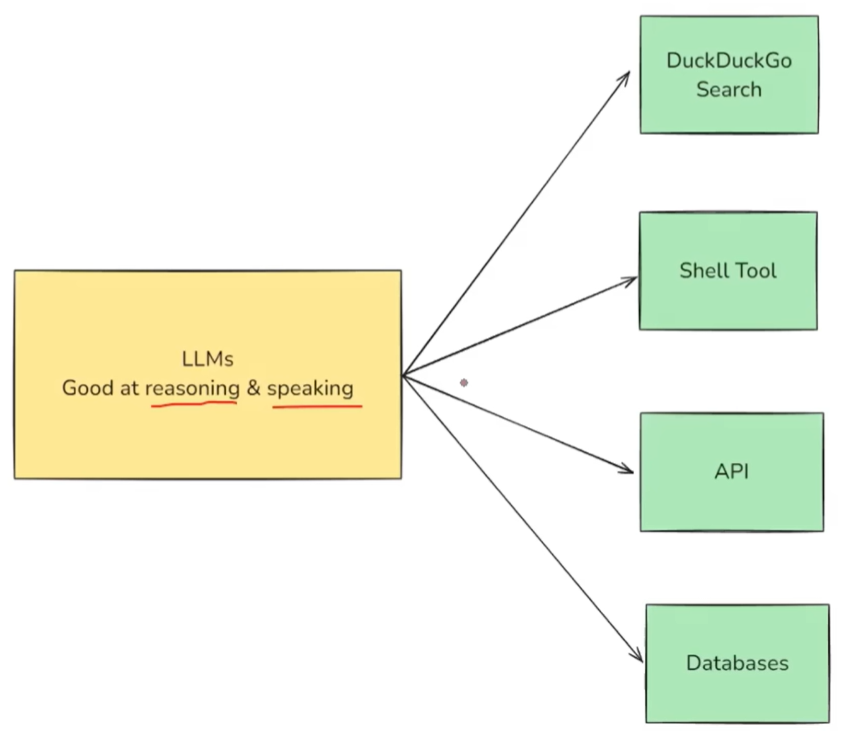

# Tool Binding

**Tool Binding** is the step where you **register tools with a Language Model (LLM)** so that:
  1. The LLM knows **what tools are available**
  2. It knows **what each tool does** (via description)
  3. It knows **what input format to use** (via schema)

**Note:** Not all LLM has capability to bind Tool

In [48]:
from langchain_openai import ChatOpenAI
from langchain.tools import tool
from langchain_core.messages import HumanMessage
import requests

In [49]:
import os
from dotenv import load_dotenv

In [50]:
load_dotenv()

True

In [51]:
OPENAI_KEY = os.getenv("OPEN_AI_KEY")

In [52]:
# tool creation

@tool
def multiply (a: int, b: int) -> int:
    """ Given 2 number a and b this tool return their product """
    return a * b

In [53]:
multiply.invoke({"a": 2, "b": 3})

6

In [54]:
multiply.name

'multiply'

In [55]:
multiply.description

'Given 2 number a and b this tool return their product'

In [56]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [61]:
# tool binding

llm = ChatOpenAI(
    api_key=OPENAI_KEY,
    model="gpt-3.5-turbo",
    base_url="https://openrouter.ai/api/v1",
    verbose=True
)

In [62]:
llm_with_tools = llm.bind_tools([multiply])

In [63]:
llm_with_tools

RunnableBinding(bound=ChatOpenAI(profile={'max_input_tokens': 16385, 'max_output_tokens': 4096, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': False, 'structured_output': False, 'image_url_inputs': False, 'pdf_inputs': False, 'pdf_tool_message': False, 'image_tool_message': False, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x0000025959F894D0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000002595987E1D0>, root_client=<openai.OpenAI object at 0x0000025959F8BA10>, root_async_client=<openai.AsyncOpenAI object at 0x0000025959F89F10>, model_kwargs={}, openai_api_key=SecretStr('**********'), openai_api_base='https://openrouter.ai/api/v1'), kwargs={'tools': [{'type': 'function', 'function': {'name': 'multiply', 'description': 'Given 2 number a and b this tool 

# Tool Calling

**Tool Calling** is the process where the **LLM (language model)** decides, during a conversation or task, that it need to **use a specific tool (function)** - and generates a structured output with:
- the **name of the tool**
- and the **arguments** to call it with

**Note**: The LLM **does not actually run the tool** - it just **suggest** the tool and the input arguments. The **actual execution is handled by LangChain or you**

In [64]:
llm_with_tools.invoke("Hi, How are You")

AIMessage(content="Hello! I'm here and ready to assist you. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 59, 'total_tokens': 78, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 5.8e-05, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 2.95e-05, 'upstream_inference_completions_cost': 2.85e-05}}, 'model_provider': 'openai', 'model_name': 'openai/gpt-3.5-turbo', 'system_fingerprint': None, 'id': 'gen-1766678330-lO5vtjCYwhwSBmoUdtl5', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b563b-f5a1-7c82-86db-af9d96ec882b-0', usage_metadata={'input_tokens': 59, 'output_tokens': 19, 'total_tokens': 78, 'input_token_details': {'audi

In [65]:
llm_with_tools.invoke("can you find 3 multiply 6")

AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 62, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 7.9e-05, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 3.1e-05, 'upstream_inference_completions_cost': 4.8e-05}}, 'model_provider': 'openai', 'model_name': 'openai/gpt-3.5-turbo', 'system_fingerprint': None, 'id': 'gen-1766690935-HwC2eTxd9EuOjb5Drzgq', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b56fc-4f46-7e61-9c0a-cc2f83430007-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 6}, 'id': 'call_dXwmSdjWv07lkf4yd5UBZg6A', 'type': 'tool_call'}], usage_metadata={'input_tokens': 62, 'output_tok

In [69]:
result = llm_with_tools.invoke("can you find 3 multiply 6")

In [72]:
result.tool_calls[0]

{'name': 'multiply',
 'args': {'a': 3, 'b': 6},
 'id': 'call_pwAW4P62VbykViIt5EgSfbBJ',
 'type': 'tool_call'}

# Tool Execution

**Tool Execution** is the step where the **actual Python Function (tool)** is run using the input arguments that the **LLM suggested during tool calling**

In simpler words: 
> The LLM says:
> "Hey, call the `multiply` tool with a=8 and b=7"
>
> **Tool Execution** is when you or LangChain actually run:  
> `multiply(a=8, b=7)`  
> -> and get the result `56`  

In [81]:
result.tool_calls[0]

{'name': 'multiply',
 'args': {'a': 3, 'b': 6},
 'id': 'call_pwAW4P62VbykViIt5EgSfbBJ',
 'type': 'tool_call'}

In [82]:
multiply.invoke({'name': 'multiply',
 'args': {'a': 3, 'b': 6},
 'id': 'call_pwAW4P62VbykViIt5EgSfbBJ',
 'type': 'tool_call'})

ToolMessage(content='18', name='multiply', tool_call_id='call_pwAW4P62VbykViIt5EgSfbBJ')

In [86]:
# demo tool calling

In [87]:
llm_with_tools = llm.bind_tools([multiply])

In [100]:
query = HumanMessage("can you multiply 3 with 1000")

In [101]:
query

HumanMessage(content='can you multiply 3 with 1000', additional_kwargs={}, response_metadata={})

In [102]:
messages = [query]

In [105]:
messages

[HumanMessage(content='can you multiply 3 with 1000', additional_kwargs={}, response_metadata={})]

In [106]:
result = llm_with_tools.invoke(messages)

In [107]:
messages.append(result)

In [108]:
messages

[HumanMessage(content='can you multiply 3 with 1000', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 63, 'total_tokens': 81, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 5.85e-05, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 3.15e-05, 'upstream_inference_completions_cost': 2.7e-05}}, 'model_provider': 'openai', 'model_name': 'openai/gpt-3.5-turbo', 'system_fingerprint': None, 'id': 'gen-1766737970-JqMbkkpfTcm95HK7Wwfg', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b59ca-0162-7e82-8030-538895e867ce-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 1000}, 'id'

In [111]:
tool_result = multiply.invoke(result.tool_calls[0])

In [112]:
messages.append(tool_result)

In [113]:
messages

[HumanMessage(content='can you multiply 3 with 1000', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 63, 'total_tokens': 81, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 5.85e-05, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 3.15e-05, 'upstream_inference_completions_cost': 2.7e-05}}, 'model_provider': 'openai', 'model_name': 'openai/gpt-3.5-turbo', 'system_fingerprint': None, 'id': 'gen-1766737970-JqMbkkpfTcm95HK7Wwfg', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b59ca-0162-7e82-8030-538895e867ce-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 1000}, 'id'

In [116]:
final_answer = llm_with_tools.invoke(messages)

In [117]:
final_answer

AIMessage(content='The product of 3 and 1000 is 3000.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 90, 'total_tokens': 105, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None, 'image_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0, 'video_tokens': 0}, 'cost': 6.75e-05, 'is_byok': False, 'cost_details': {'upstream_inference_cost': None, 'upstream_inference_prompt_cost': 4.5e-05, 'upstream_inference_completions_cost': 2.25e-05}}, 'model_provider': 'openai', 'model_name': 'openai/gpt-3.5-turbo', 'system_fingerprint': None, 'id': 'gen-1766738144-T4m4U7gfUavjvI8U67s8', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b59cc-a8a1-7b63-85ec-6ef2b03f78d3-0', usage_metadata={'input_tokens': 90, 'output_tokens': 15, 'total_tokens': 105, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'outp

In [118]:
final_answer.content

'The product of 3 and 1000 is 3000.'